In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("online_retail_II.csv", encoding="latin1")
print(df.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [2]:
df.isnull().sum()


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [3]:
# Cell 1 — imports and plotting config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
%matplotlib inline

print("Python and plotting libraries ready. CWD:", os.getcwd())


Python and plotting libraries ready. CWD: C:\Users\Hp\anaconda_projects\4f63bb91-e783-4104-a4e8-af2225f6fb79


In [4]:
# Cell 2 — load the CSV (adjust filename if needed)
fname = "online_retail_II.csv"
if not os.path.exists(fname):
    raise FileNotFoundError(f"File '{fname}' not found in {os.getcwd()}. Place the CSV in this folder or provide a path.")

df = pd.read_csv(fname, encoding="latin1")
print("Loaded:", fname)
df.head()


Loaded: online_retail_II.csv


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Cell 3 — quick inspection
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
display(df.info())
display(df.isnull().sum())


Shape: (1067371, 8)

Columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


None

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
# Cell 4 — cleaning
# Note: column names from your sample: 'Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country'
# 1) Drop rows without Customer ID
df = df.dropna(subset=['Customer ID'])

# 2) Ensure numeric types (some CSVs may have weird types)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3) Remove non-positive transactions (returns/cancellations)
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# 4) Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# 5) Create TotalSpend
df['TotalSpend'] = df['Quantity'] * df['Price']

# 6) Convert Customer ID to integer-type (optional)
df['Customer ID'] = df['Customer ID'].astype(int)

print("After cleaning shape:", df.shape)
display(df.info())


After cleaning shape: (805549, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  int64         
 7   Country      805549 non-null  object        
 8   TotalSpend   805549 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 61.5+ MB


None

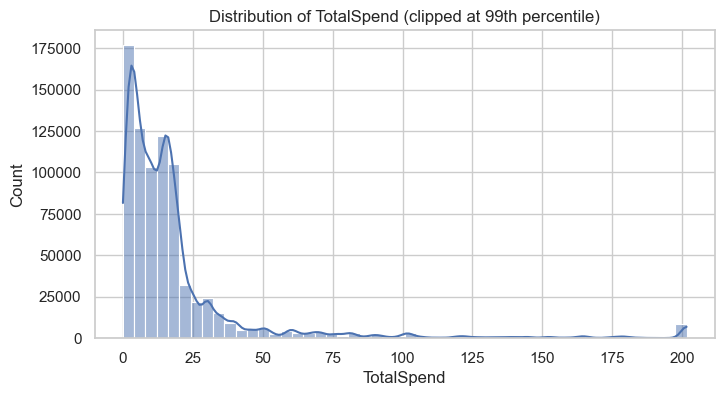

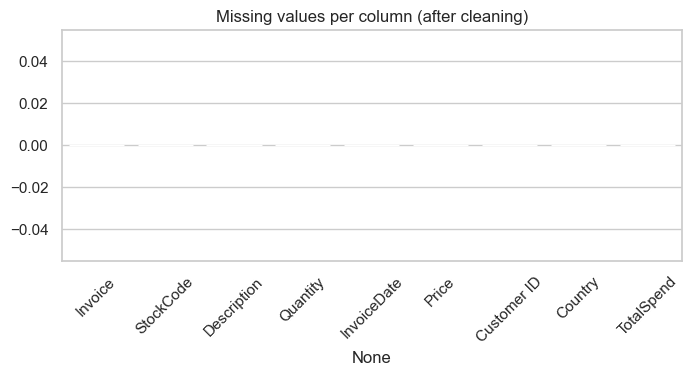

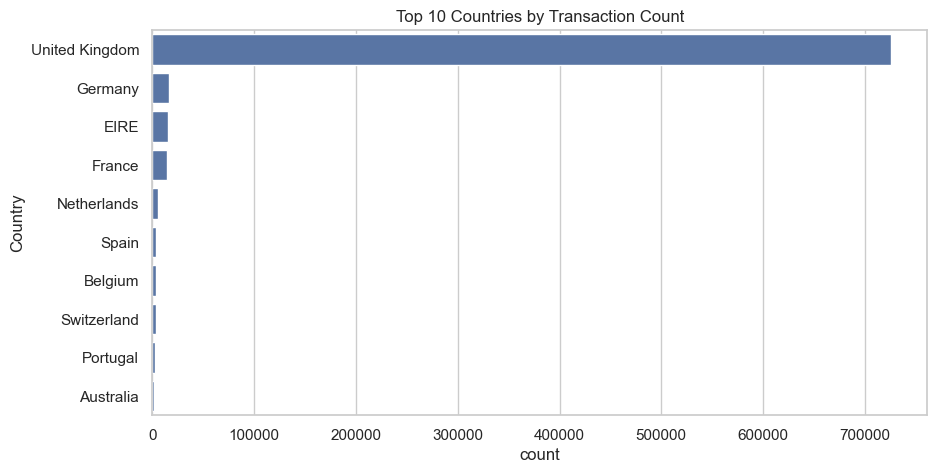

In [7]:
# Cell 5 — Visual checks
plt.figure(figsize=(8,4))
sns.histplot(df['TotalSpend'].clip(upper=df['TotalSpend'].quantile(0.99)), bins=50, kde=True)
plt.title("Distribution of TotalSpend (clipped at 99th percentile)")
plt.xlabel("TotalSpend")
plt.show()

# Missing values (should be none for key fields)
missing = df.isnull().sum()
plt.figure(figsize=(8,3))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45)
plt.title("Missing values per column (after cleaning)")
plt.show()

# Top 10 countries
plt.figure(figsize=(10,5))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index[:10])
plt.title("Top 10 Countries by Transaction Count")
plt.show()


In [8]:
# Cell 6 — RFM calculation
# Reference date = one day after the last invoice in the dataset
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference (latest) date used for Recency:", latest_date.date())

rfm_table = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency in days
    'Invoice': 'nunique',                                   # Frequency: number of unique invoices
    'TotalSpend': 'sum'                                     # Monetary: total spend
}).rename(columns={'InvoiceDate':'Recency', 'Invoice':'Frequency', 'TotalSpend':'Monetary'})

# Quick stats
display(rfm_table.head())
display(rfm_table.describe().round(2))


Reference (latest) date used for Recency: 2011-12-10


,Recency,Frequency,Monetary
Customer ID,,,
12346,326,12,77556.46
12347,2,8,5633.32
12348,75,5,2019.40
12349,19,4,4428.69
12350,310,1,334.40


,Recency,Frequency,Monetary
count,5878.00,5878.00,5878.00
mean,201.33,6.29,3018.62
std,209.34,13.01,14737.73
min,1.00,1.00,2.95
25%,26.00,1.00,348.76
50%,96.00,3.00,898.92
75%,380.00,7.00,2307.09
max,739.00,398.00,608821.65


In [9]:
# Cell 7 — optional: clip extreme monetary values at 99th percentile to reduce skew for scoring/plots
mon_99 = rfm_table['Monetary'].quantile(0.99)
print("99th percentile of Monetary:", mon_99)
rfm_table['Monetary_clipped'] = rfm_table['Monetary'].clip(upper=mon_99)
rfm_table[['Monetary','Monetary_clipped']].describe().round(2)


99th percentile of Monetary: 29730.420199999626


,Monetary,Monetary_clipped
count,5878.00,5878.00
mean,3018.62,2352.91
std,14737.73,4338.25
min,2.95,2.95
25%,348.76,348.76
50%,898.92,898.92
75%,2307.09,2307.09
max,608821.65,29730.42


In [10]:
# Cell 8 — scoring: 1 (worst) to 5 (best)
# For Recency: smaller recency (more recent) is better -> reverse the labels
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 5, labels=[5,4,3,2,1]).astype(int)

# For Frequency and Monetary: higher is better
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary_clipped'], 5, labels=[1,2,3,4,5]).astype(int)

# Combine to RFM string and numeric score
rfm_table['RFM_Score'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)
rfm_table['RFM_Sum'] = rfm_table['R_Score'] + rfm_table['F_Score'] + rfm_table['M_Score']

display(rfm_table[['Recency','Frequency','Monetary','R_Score','F_Score','M_Score','RFM_Score','RFM_Sum']].head())


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Sum
Customer ID,,,,,,,,
12346,326,12,77556.46,2,5,5,255,12
12347,2,8,5633.32,5,4,5,545,14
12348,75,5,2019.40,3,4,4,344,11
12349,19,4,4428.69,5,3,5,535,13
12350,310,1,334.40,2,1,2,212,5


In [11]:
# Cell 9 — map RFM to segments (rule-based)
def map_segment(row):
    r,f,m = row['R_Score'], row['F_Score'], row['M_Score']
    # Champions: top in all three
    if (r >= 4) and (f >= 4) and (m >= 4):
        return 'Champions'
    # Loyal: frequent and monetary strong
    if (f >= 4) and (m >= 3):
        return 'Loyal'
    # Potential loyalists: recent and moderate frequency
    if (r >= 4) and (f >= 3):
        return 'Potential'
    # At Risk: low recency (haven't bought recently) but used to buy
    if (r <= 2) and (f >= 3):
        return 'At Risk'
    # Low Value
    if (r <= 2) and (f <= 2) and (m <= 2):
        return 'Low Value'
    # Others
    return 'Others'

rfm_table['Segment'] = rfm_table.apply(map_segment, axis=1)
rfm_table['Segment'].value_counts().sort_values(ascending=False)


Segment
Others       1373
Champions    1300
Low Value    1275
Loyal         970
At Risk       498
Potential     462
Name: count, dtype: int64

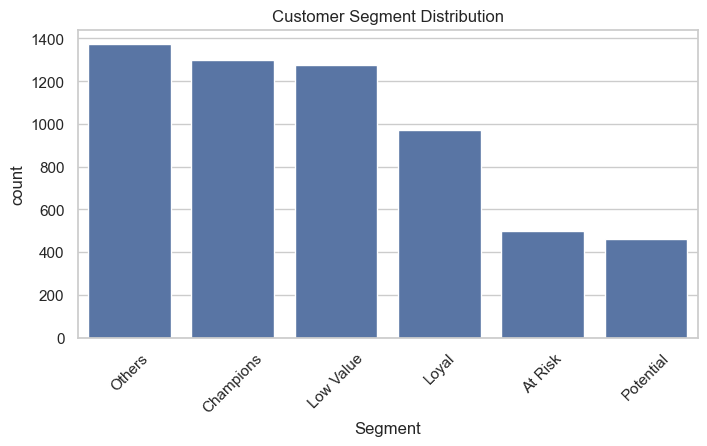

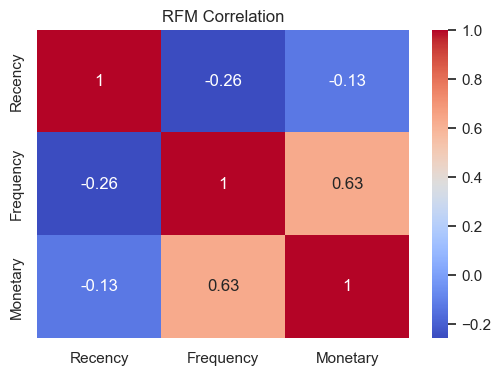

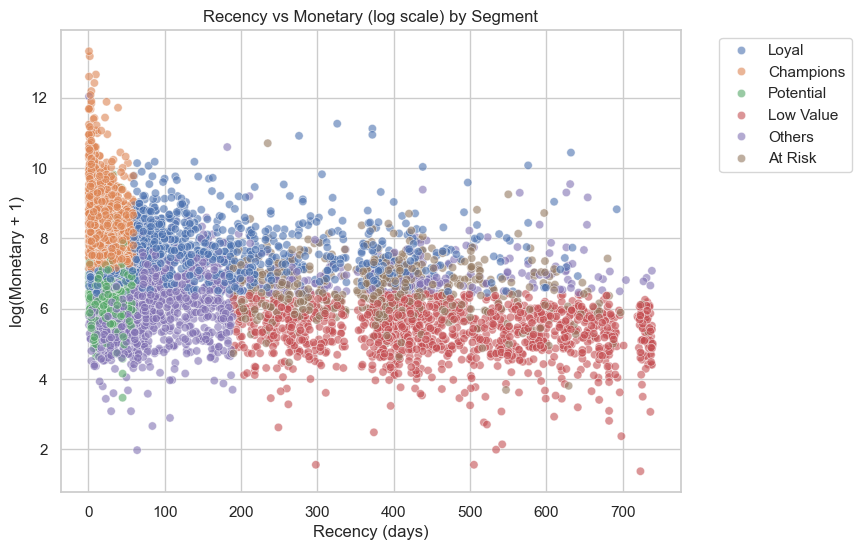

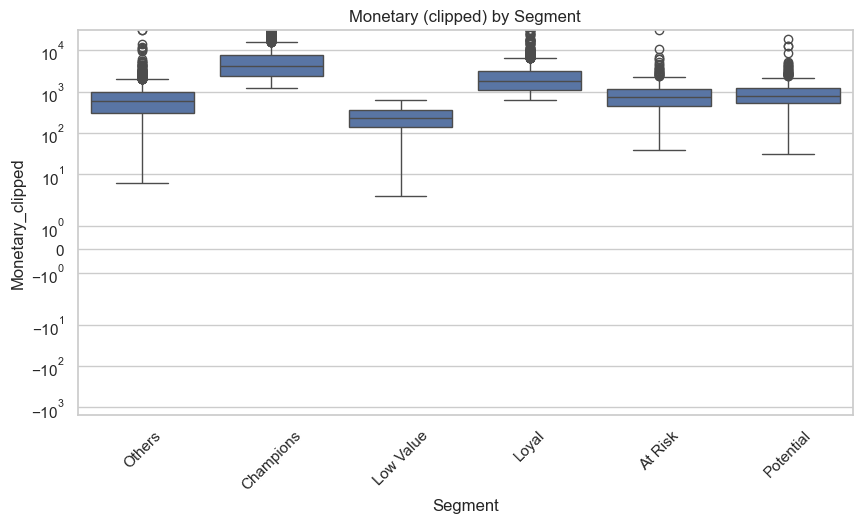

In [12]:
# Cell 10 — visuals for segments
plt.figure(figsize=(8,4))
sns.countplot(x='Segment', data=rfm_table.reset_index(), order=rfm_table['Segment'].value_counts().index)
plt.title('Customer Segment Distribution')
plt.xticks(rotation=45)
plt.show()

# Heatmap of correlations among RFM metrics
plt.figure(figsize=(6,4))
sns.heatmap(rfm_table[['Recency','Frequency','Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('RFM Correlation')
plt.show()

# Monetary vs Recency scatter (log scale for Monetary to reduce skew)
plt.figure(figsize=(8,6))
plot_df = rfm_table.reset_index()
sns.scatterplot(x='Recency', y=np.log1p(plot_df['Monetary']), hue='Segment', data=plot_df, alpha=0.6)
plt.xlabel('Recency (days)')
plt.ylabel('log(Monetary + 1)')
plt.title('Recency vs Monetary (log scale) by Segment')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# Boxplot Monetary by Segment (use clipped Monetary)
plt.figure(figsize=(10,5))
sns.boxplot(x='Segment', y='Monetary_clipped', data=plot_df, order=rfm_table['Segment'].value_counts().index)
plt.yscale('symlog')  # safer scale for heavy tails
plt.title('Monetary (clipped) by Segment')
plt.xticks(rotation=45)
plt.show()


In [13]:
# Cell 11 — per-segment summary and export to CSV
segment_summary = rfm_table.reset_index().groupby('Segment').agg({
    'Customer ID': 'count' if 'Customer ID' in rfm_table.reset_index().columns else ('Customer ID','count'),
    'Recency': 'median',
    'Frequency': 'median',
    'Monetary': 'median'
}).rename(columns={'Customer ID':'CustomerCount'})

# If renaming above failed due to column names, do fallback:
if 'CustomerCount' not in segment_summary.columns:
    segment_summary = rfm_table.reset_index().groupby('Segment').agg({
        'Customer ID': 'count',
        'Recency': 'median',
        'Frequency': 'median',
        'Monetary': 'median'
    }).rename(columns={'Customer ID':'CustomerCount'})

display(segment_summary.sort_values('CustomerCount', ascending=False).round(2))

# Export RFM table for later use
rfm_table.to_csv("rfm_table_exports.csv")
print("Saved rfm_table_exports.csv in", os.getcwd())


,CustomerCount,Recency,Frequency,Monetary
Segment,,,,
Others,1373,81.0,2.0,602.56
Champions,1300,16.0,11.0,4018.76
Low Value,1275,443.0,1.0,233.35
Loyal,970,120.0,6.0,1808.54
At Risk,498,384.5,3.0,732.20
Potential,462,23.0,3.0,788.94


Saved rfm_table_exports.csv in C:\Users\Hp\anaconda_projects\4f63bb91-e783-4104-a4e8-af2225f6fb79


In [14]:
# Cell 12 — quick recommendations printed for your notebook
counts = rfm_table['Segment'].value_counts(normalize=True).mul(100).round(2)
print("Segment proportions (%):\n", counts)
print("\nRecommendations (short):")
print("- Champions: VIP program, invite-only offers, high-touch retention.")
print("- Loyal: Cross-sell and upsell, personalized product bundles.")
print("- Potential: Nudge with discounts or bundles to convert to Loyal.")
print("- At Risk: Win-back campaigns + reactivation discounts.")
print("- Low Value: Low-cost retention or exclude from high-cost campaigns.")


Segment proportions (%):
 Segment
Others       23.36
Champions    22.12
Low Value    21.69
Loyal        16.50
At Risk       8.47
Potential     7.86
Name: proportion, dtype: float64

Recommendations (short):
- Champions: VIP program, invite-only offers, high-touch retention.
- Loyal: Cross-sell and upsell, personalized product bundles.
- Potential: Nudge with discounts or bundles to convert to Loyal.
- At Risk: Win-back campaigns + reactivation discounts.
- Low Value: Low-cost retention or exclude from high-cost campaigns.


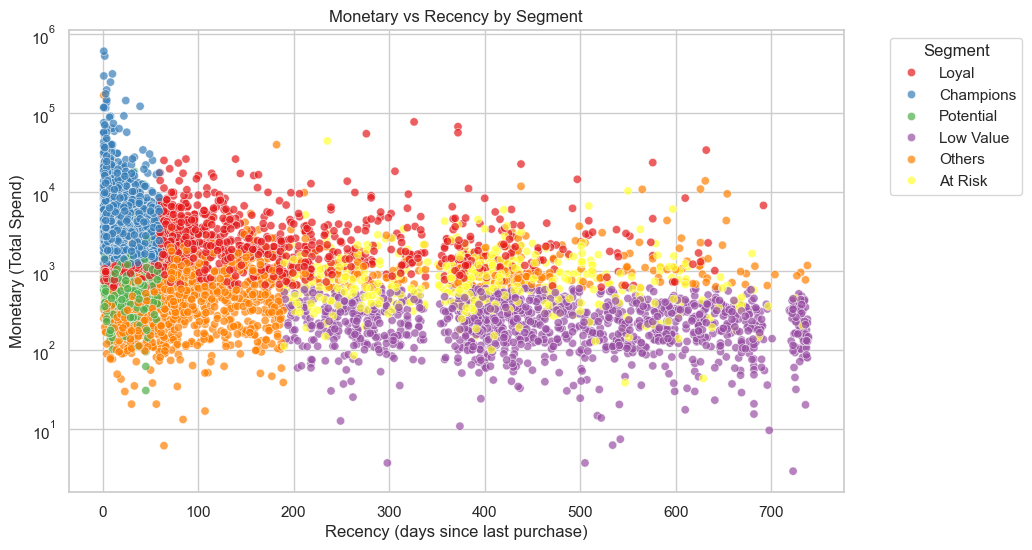

In [15]:
# Scatterplot: Monetary vs Recency
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Recency", 
    y="Monetary", 
    hue="Segment", 
    data=rfm_table.reset_index(),
    palette="Set1",
    alpha=0.7
)
plt.title("Monetary vs Recency by Segment")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Monetary (Total Spend)")
plt.yscale("log")  # log scale for better visibility
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


###  Scatterplot: Monetary vs Recency by Segment  

This scatterplot shows how customers are distributed across **Recency (days since last purchase)** and **Monetary (total spend)**.  

- **X-axis (Recency):** Lower values = more recent purchases.  
- **Y-axis (Monetary):** Higher values = customers who spent more.  
- **Colors:** Represent customer segments (Champions, At Risk, etc.).  

####  Insights
- **Champions** appear on the **right-bottom quadrant**: recent buyers with high spending.  
- **At Risk** customers cluster on the **top-right**: high spenders but not active recently.  
- **Low Value customers** are at the **top-left**: they buy rarely and spend little.  
- **Potential Loyalists** sit in the middle, with moderate spending and frequency.  

####  Business Takeaway
Focus marketing on **retaining Champions** and **re-engaging At Risk customers** with personalized offers, while nurturing **Potential Loyalists** into higher-value buyers.
